# Untitled Supermarked Project
## Queuing Simulator
This Queuing Simulator is very flexible, but is tailored to the case/ dataset.

### Importing Libraries

In [272]:
# DataFrames
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
# Statistics
from scipy import stats 
# Array and Array Math
import numpy as np

### Functions

In [273]:
# Random generates an Entry-Process
def entry_process(packages, variable, parameters):
    # Set up Collector for results
    results       = pd.DataFrame([])
    # Generates randomly how much time passes between Customers
    results["time"]  = variable(** parameters, size = packages)
    # Sum up to determine entry time of each customer
    results["entry"] = results.time.cumsum()
    # Return results
    return results["entry"]

In [274]:
# Random-generates the the service-process and the resulting exit-process
def service_process(entries, variable, parameters, shifts):
    # Turn Shifts into Stations
    stations = np.array(shifts, dtype=[('ready', '<f8'), ('close', '<f8')])
    # Set up Collectors for Results
    results_service = ([])
    results_station = ([])
    results_exit    = ([]) 
    # Cycle through Customers of the Entry-Process
    for idx in entries:      
        # Index of next available Station
        # Customer chooses Station which has been unoccupied the longest
        free = np.nanmin(np.argwhere(stations["ready"] == np.nanmin(stations["ready"])))
        # Add Time when Customer is being serviced
        results_service.append(max(idx,stations["ready"][free])) 
        # Generate time when Customer is done
        done = float(max(idx,stations["ready"][free]) + variable(** parameters, size = 1))
        # Add Time when Customer is done
        results_exit.append(done)
        # Add used Station
        results_station.append(free)
        # Check if shift is over and Station to be closed
        if(stations["close"][free] <= done):
            # Close Station
            stations["ready"][free] = np.nan
        else:
            # Update Station's Ready Time
            stations["ready"][free] = done   
    # Return results
    return results_service, results_exit, results_station

In [275]:
# Simulate Queue
def makeq(n_customers,
          entry_variable,entry_variable_parameters,
          service_variable,service_variable_parameters,
          shifts):
    # Set Up Collector for Results
    overview                              = pd.DataFrame([])
    # Random Generate Entrance of Customers
    overview["entry"]                     = entry_process(n_customers,
                                                          entry_variable,
                                                          entry_variable_parameters)
    # Random Generate Service/ Exit of Customers
    overview["service"], overview["exit"], overview["station"] = service_process(overview["entry"], 
                                                                                 service_variable,
                                                                                 service_variable_parameters, 
                                                                                 shifts)
    # Return resulting Dataframe
    return(overview)

### Test Runs
The number of service stations (c) will be derived from "shifts", in order to process the information from the data-set. Shifts will be a list of tupels, comprising of the beginning and the end of the shift.<br>
- c = 1 will be [(0,np.nan)], meaning on shift that starts at 0 and ends at the end of the run.<br>
- c = 2 will be [(0,np.nan),(0,np.nan)].<br>

You can find explanations on the Kendall Notation [here](https://en.wikipedia.org/wiki/Kendall%27s_notation).<br>

#### M/M/1 Queue
- $ \lambda $ : 1
- $ \mu $ : 1

In [276]:
title                       = "M/M/1 - Queue"
n_customers                 = 100
entry_variable              = stats.expon.rvs
entry_variable_parameters   = {"loc" : 0, "scale" : 1, "random_state" : 0}
service_variable            = stats.expon.rvs
service_variable_parameters = {"loc" : 0, "scale" : 1, "random_state" : 0}
shifts                      = [(0,np.nan)]

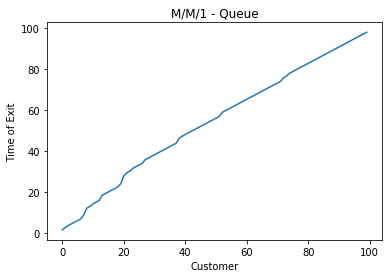

In [277]:
# Gernerate Data
example = makeq(n_customers,
                entry_variable,   entry_variable_parameters,
                service_variable, service_variable_parameters,
                shifts)
# Plot Results
plt.title(title)
plt.plot(example.exit)
plt.ylabel("Time of Exit")
plt.xlabel("Customer")
plt.show()

#### M/M/2 Queue
- $ \lambda $ : 1
- $ \mu $ : 1

In [278]:
title                       = "M/M/2 - Queue"
n_customers                 = 100
entry_variable              = stats.expon.rvs
entry_variable_parameters   = {"loc" : 0, "scale" : 1, "random_state" : 0}
service_variable            = stats.expon.rvs
service_variable_parameters = {"loc" : 0, "scale" : 1, "random_state" : 0}
shifts                      = [(0,np.nan),(0,np.nan)]

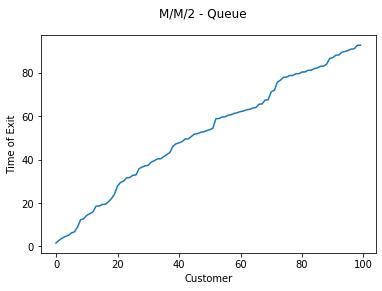

In [279]:
# Gernerate Data
example = makeq(n_customers,
                entry_variable, entry_variable_parameters,
                service_variable,service_variable_parameters,
                shifts)
# Plot Results
plt.suptitle(title)
plt.plot(example.exit)
plt.ylabel("Time of Exit")
plt.xlabel("Customer")
plt.show()

#### M/M/c(t) Queue
- $ \lambda $ : 0.5
- $ \mu $ : 1
- <b>c(t)</b> : 1 for t <= 20 and t >= 40, 2 for t > 20 and t < 40

In [280]:
title                       = "M/M/c(t) - Queue"
n_customers                 = 100
entry_variable              = stats.expon.rvs
entry_variable_parameters   = {"loc" : 0, "scale" : 1, "random_state" : 0}
service_variable            = stats.expon.rvs
service_variable_parameters = {"loc" : 0, "scale" : 1, "random_state" : 0}
shifts                      = [(0,np.nan),(20,40)]

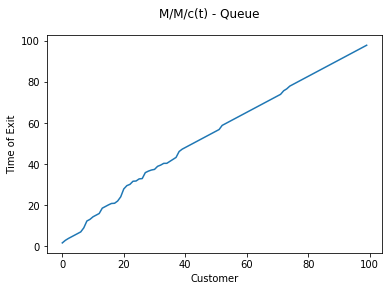

In [281]:
# Gernerate Data
example = makeq(n_customers,
                entry_variable, entry_variable_parameters,
                service_variable,service_variable_parameters,
                shifts)
# Plot Results
plt.suptitle(title)
plt.plot(example.exit)
plt.ylabel("Time of Exit")
plt.xlabel("Customer")
plt.show()

## Work in Progess

### Monte Carlo Studies 

In [ ]:
runs       = 100
resolution = 5

In [ ]:
sets = pd.DataFrame([])
for idx in range(1,runs+1):    
    sets = sets.append(makeq(n_customers,entry_variable,entry_variable_parameters,service_variable,service_variable_parameters).exit)

In [ ]:
results = pd.DataFrame([])
for idx in range(0,int(sets.max().max())+1,resolution):
    results[str(idx)] = (((sets >= 0 + idx)&(sets > idx + resolution)).sum(axis = 1))

In [ ]:
plt.boxplot(results.T)
plt.show()

In [ ]:
test     = makeq(n_customers,entry_variable,entry_variable_parameters,service_variable,service_variable_parameters).exit
results2 = pd.DataFrame([])
for idx in range(0,int(test.max().max())+1,resolution):
    results2[str(idx)] = ((test >= 0 + idx)&(test > idx + resolution))

### Analytics

In [ ]:
plt.suptitle(title)
plt.title("No Wait vs Wait")
plt.pie([((example.service - example.entry) == 0).sum(),
         ((example.service - example.entry) != 0).sum()],
       labels = ["No Wait","Wait"])
plt.show()

In [ ]:
waiting_times = example.service - example.entry
plt.suptitle(title)
plt.title("Waiting Time Distribution")
plt.ylabel("Count")
plt.xlabel("Waiting Times in Seconds")
plt.hist(waiting_times[waiting_times>0])
plt.show()

In [ ]:
plt.suptitle(title)
plt.scatter(y = (example.service-example.entry), x = example.entry, c = example.station)
plt.ylabel("Waiting Time")
plt.xlabel("Time of Entry")
plt.show()

## Future Works
### Queue Generator:
- Offer Choice to end QueueSim after specific time passed vs specific number of customers<br>
- Non Stationary Entry-Process<br>
- Non Stationary Service-Process<br>

### Monte Carlo Simulation:
- Repeat Queue Generation<br>
- Analyze Results<br>
- Compare Results to actual case<br>

### Analysis
- Visualize Waiting Statistics<br>

### General
- Export Functions<br>
- Consider List vs Numpy vs Pandas<br>
- Consider Object-Oriented approach<br>